### Multi Level AI Math Solver Agents using OpenAI LLM

In [8]:
from dotenv import load_dotenv
import os
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from graphviz import Digraph
from IPython.display import Image, display

# Load .env
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# Initialize LangChain LLM
llm = ChatOpenAI(
    model_name="gpt-4o-mini",
    temperature=0,
    openai_api_key=api_key
)


/var/folders/b1/06nddx952f1g_2r63y2n569c0000gn/T/ipykernel_92152/3734200493.py:13: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


In [9]:
# Supervisor Agent: decides which level agent to route to
def supervisor_agent(level):
    level = level.lower()
    if level == "school":
        return "school_agent"
    elif level == "college":
        return "college_agent"
    elif level == "university":
        return "university_agent"
    else:
        raise ValueError("Unknown level")

# Level Agents using ChatOpenAI
def school_agent(question):
    prompt = ChatPromptTemplate.from_template("""
You are a School Math Tutor.
Solve the following problem in simple steps.
Use examples with apples, toys, or money.
Avoid heavy jargon.
Question: {question}
""")
    ai_message = llm(prompt.format_prompt(question=question).to_messages())
    return ai_message.content

def college_agent(question):
    prompt = ChatPromptTemplate.from_template("""
You are a College Math Tutor.
Solve the problem with detailed steps, use proper math notation,
and provide a short hint for learning reinforcement.
Question: {question}
""")
    ai_message = llm(prompt.format_prompt(question=question).to_messages())
    return ai_message.content

def university_agent(question):
    prompt = ChatPromptTemplate.from_template("""
You are a University Math Professor.
Solve the problem rigorously with formal notation, proofs if necessary,
and mention applications if relevant.
Question: {question}
""")
    ai_message = llm(prompt.format_prompt(question=question).to_messages())
    return ai_message.content


In [10]:
def multi_agent_system(question, level):
    # Step 1: Supervisor decides
    agent_name = supervisor_agent(level)
    
    # Step 2: Route to appropriate agent
    if agent_name == "school_agent":
        return school_agent(question)
    elif agent_name == "college_agent":
        return college_agent(question)
    elif agent_name == "university_agent":
        return university_agent(question)


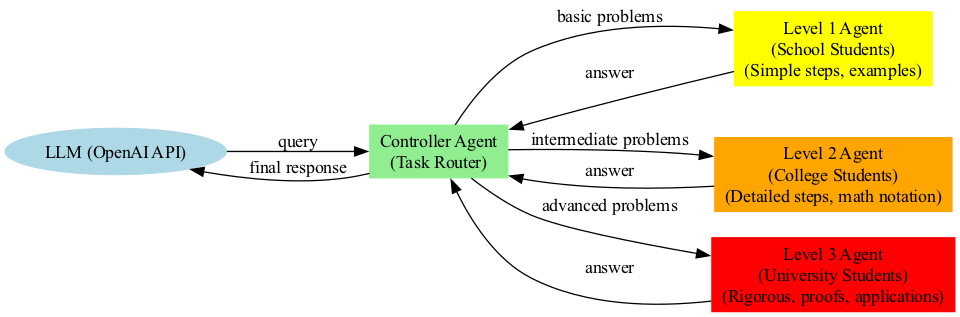

In [11]:
from graphviz import Digraph
from IPython.display import Image, display

# Create directed graph
dot = Digraph(comment="Multi-Agent Math System", format="png")
dot.attr(rankdir='LR', size='10,6')  # Left-to-right

# Main LLM Node
dot.node("LLM", "LLM (OpenAI API)", shape="ellipse", style="filled", color="lightblue")

# Controller/Task Router
dot.node("Controller", "Controller Agent\n(Task Router)", shape="box", style="filled", color="lightgreen")

# Level-specific Agents
dot.node("L1", "Level 1 Agent\n(School Students)\n(Simple steps, examples)", shape="box", style="filled", color="yellow")
dot.node("L2", "Level 2 Agent\n(College Students)\n(Detailed steps, math notation)", shape="box", style="filled", color="orange")
dot.node("L3", "Level 3 Agent\n(University Students)\n(Rigorous, proofs, applications)", shape="box", style="filled", color="red")

# Edges: LLM sends query to Controller
dot.edge("LLM", "Controller", label="query")

# Controller routes to level agents
dot.edge("Controller", "L1", label="basic problems")
dot.edge("Controller", "L2", label="intermediate problems")
dot.edge("Controller", "L3", label="advanced problems")

# Level agents send answers back to Controller
dot.edge("L1", "Controller", label="answer")
dot.edge("L2", "Controller", label="answer")
dot.edge("L3", "Controller", label="answer")

# Controller sends final response to LLM
dot.edge("Controller", "LLM", label="final response")

# Render and display
output_path = "multi_agent_workflow"
dot.render(output_path, cleanup=True)

# Display inside notebook
display(Image(filename=output_path + ".png"))


In [14]:

from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate


# Define prompt templates for different agent levels
prompts = {
    "school": ChatPromptTemplate.from_messages([
        HumanMessagePromptTemplate.from_template(
            "You are a Level 1 Math Agent for school students. "
            "Solve problems in simple, step-by-step way using examples. "
            "Avoid complex terms. Problem: {question}"
        )
    ]),
    "college": ChatPromptTemplate.from_messages([
        HumanMessagePromptTemplate.from_template(
            "You are a Level 2 Math Agent for college students. "
            "Solve problems with detailed steps, using math notation when necessary. "
            "Provide short hints. Problem: {question}"
        )
    ]),
    "university": ChatPromptTemplate.from_messages([
        HumanMessagePromptTemplate.from_template(
            "You are a Level 3 Math Agent for university students. "
            "Solve problems rigorously with proofs if needed. "
            "Include applications and formal notation. Problem: {question}"
        )
    ]),
}

# Example problems for each agent (3 per level)
test_cases = {
    "school": ["12 × 8", "15 - 7", "x + 5 = 12"],
    "college": ["Derivative of 3x^2 + 5x", "2x^2 - 4x - 6 = 0", "∫(2x + 3) dx"],
    "university": ["dy/dx + y = e^x", "Eigenvalues of [[2,1],[1,3]]", "P(X > 2) for X ~ N(0,1)"],
}

# Function to query agent
def ask_agent(level, question):
    prompt = prompts[level].format_prompt(question=question)
    response = llm(prompt.to_messages())
    return response.content.strip()  # clean text

# Run test cases and display nicely
for level, problems in test_cases.items():
    print(f"\n=== {level.capitalize()} Agent ===")
    for q in problems:
        ans = ask_agent(level, q)
        print(f"Q: {q}")
        print(f"A: {ans}\n")



=== School Agent ===
Q: 12 × 8
A: To solve the problem \( 12 \times 8 \), we can break it down into simpler steps. Here’s how to do it:

### Step 1: Understand what multiplication means
Multiplication is like adding the same number many times. For example, \( 12 \times 8 \) means we are adding the number 12 a total of 8 times.

### Step 2: Write it out as addition
So, we can write:
\[ 
12 + 12 + 12 + 12 + 12 + 12 + 12 + 12 
\]

### Step 3: Add the numbers
Now, let’s add them step by step:
- First, add the first two: 
  \[ 
  12 + 12 = 24 
  \]
- Then add the next 12:
  \[ 
  24 + 12 = 36 
  \]
- Next:
  \[ 
  36 + 12 = 48 
  \]
- Then:
  \[ 
  48 + 12 = 60 
  \]
- Next:
  \[ 
  60 + 12 = 72 
  \]
- Then:
  \[ 
  72 + 12 = 84 
  \]
- Finally:
  \[ 
  84 + 12 = 96 
  \]

### Step 4: Conclusion
So, when we add 12 a total of 8 times, we get:
\[ 
12 \times 8 = 96 
\]

Therefore, the answer is:
\[ 
\boxed{96} 
\]

Q: 15 - 7
A: Sure! Let's solve the problem step by step.

**Problem:** 15 - 7